In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [114]:
dados = pd.read_csv("./databases/tratado/consumo residencial por regiao/consumo residencial por regiao.csv")

In [115]:
print(dados.head())

    ANO        REGIAO      JAN      FEV      MAR      ABR      MAI      JUN  \
0  2023         Norte   908626   864397   948603   936381   999291  1044363   
1  2023      Nordeste  2805490  2778418  2861484  2795542  2923572  2711658   
2  2023       Sudeste  5855815  6333221  6829244  6388977  5936085  5888541   
3  2023           Sul  2347905  2605102  2503873  2354969  2049470  2064325   
4  2023  Centro-Oeste  1152181  1149605  1223054  1227059  1170399  1129768   

       JUL      AGO      SET      OUT      NOV      DEZ  
0  1036735  1123220  1186719  1222328  1235789  1171554  
1  2611503  2703657  2874947  2899670  3119037  3097885  
2  5751792  5929765  6212348  6607791  6880970  7080335  
3  2112131  2062813  2092123  2210632  2176246  2446622  
4  1071272  1179502  1318678  1479546  1529415  1522554  


In [116]:
#Definindo Regiao e Mes a serem analisados
mes = 'DEZ'
regiao = 'Norte'

dados = dados[dados['REGIAO'] == regiao]

In [117]:
#Separando as variáveis X e Y
X = dados['ANO'].values
Y = dados[mes].values

In [118]:
#Calculando coeficiente de correlação de Pearson
r = pearsonr(X, Y)
print(f'Coeficiente de correlação: {r}')

Coeficiente de correlação: PearsonRResult(statistic=0.9683897232754596, pvalue=2.668388631216941e-12)


In [119]:
#Separando dados de treino e de teste
#Utilizamos 70% dos dados para treino e o restante (30%) para teste.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [120]:
#Redimensionando os dados para fazer a regressão linear
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [121]:
#Treinando o modelo
reg = LinearRegression()
reg.fit(x_train, y_train)
pred = reg.predict(x_test)

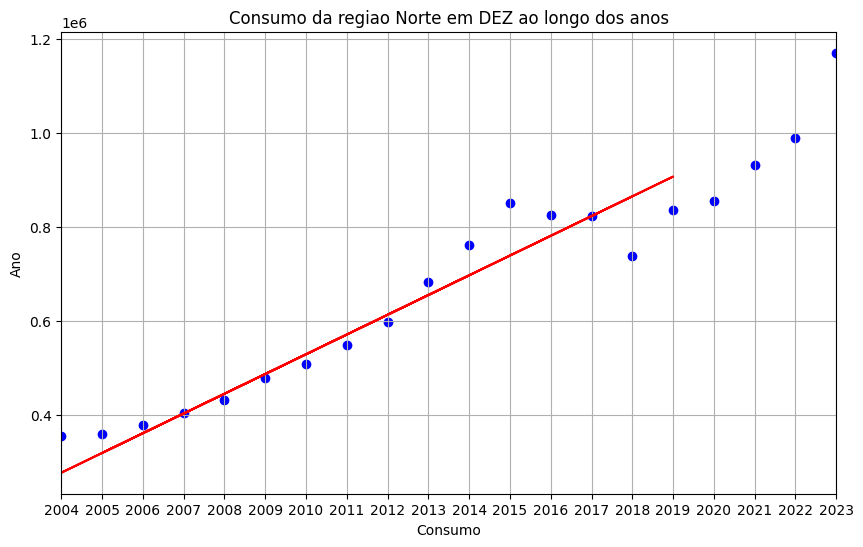

In [122]:
#Plotando a regressao linear
plt.figure(figsize=(10, 6))
plt.grid()
plt.scatter(X, Y, color="blue")
plt.plot(x_test, pred, color="red")
plt.title(f'Consumo da regiao {regiao} em {mes} ao longo dos anos')
plt.xlabel('Consumo')
plt.ylabel('Ano')
plt.xlim(min(dados['ANO'].values), max(dados['ANO'].values))
plt.xticks(range(min(dados['ANO'].values), max(dados['ANO'].values) + 1, 1))
plt.show()

In [126]:
# Obtendo os coeficientes da função linear
coeficiente_angular = reg.coef_[0]
coeficiente_linear = reg.intercept_

# Função da regressão linear
print(coeficiente_linear, coeficiente_angular)

[-83926561.87650605] [42018.07680723]
